## Part 2. Hands-on exercise

In this exercise, we will build a multi-class classifier with the the [California Housing dataset](https://scikit-learn.org/stable/datasets/real_world.html#california-housing-dataset), the same one as Exercise 02 & 04.

The goal of the classifier is to perform a multi-class classification taks:
- 0 represents 'Low Price', 'MedHouseVal' < 1
- 1 represents 'Normal Price', 1 <= 'MedHouseVal' <= 2.5
- 2 represents 'Expensive Price', 'MedHouseVal' > 2.5

<span style="color:red">**[TBC]**</span> Please build the classifier with KNN and SVM respectively.

In [18]:
# import all libraries used in this notebook here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.model_selection import train_test_split, GridSearchCV
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline  # To handle SMOTE with cross-validation
from sklearn.model_selection import RandomizedSearchCV


from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.feature_selection import RFE
from sklearn.feature_selection import VarianceThreshold
from sklearn.svm import LinearSVC

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score


### Task 1. Load the California Housing Dataset

<span style="color:red">**[TBC]**</span> It can be downloaded/loaded using the `sklearn.datasets.fetch_california_housing()` function.

In [2]:

# [TBC] complete your code here with proper comments
from sklearn.datasets import fetch_california_housing

# Assuming feature_df is already defined and contains the last 10 features
# Load the original California housing dataset's target values
data_California = fetch_california_housing(as_frame=True)
target_df = data_California.target


### Task 2. Create the target labels

<span style="color:red">**[TBC]**</span> Use `MedHouseVal` as the reference to create a pandas series as the new targel variable.

In [3]:
# Create a multi-class target variable based on the value of MedHouseVal
new_target = pd.Series(index=target_df.index) # Initialize with the same index
new_target[target_df < 1] = 0
new_target[(target_df >= 1) & (target_df <= 2.5)] = 1
new_target[target_df > 2.5] = 2


# Create the multi-class target variable based on the value of MedHouseVal
target_df = pd.cut(target_df, bins=[-float("inf"), 1, 2.5, float("inf")], labels=[0, 1, 2])


# Ensure the data type is integer for the new target
new_target = new_target.astype(int)
# count the number of values in a Pandas Series
new_target_count = new_target.count()
print("Total target values labeled",new_target_count)

# Check the balance of the newly created classes
print("Number of 'Low Price' class (0):", sum(new_target == 0))
print("Number of 'Normal Price' class (1):", sum(new_target == 1))
print("Number of 'Expensive Price' class (2):", sum(new_target == 2))

Total target values labeled 20640
Number of 'Low Price' class (0): 3596
Number of 'Normal Price' class (1): 11262
Number of 'Expensive Price' class (2): 5782


C:\Users\Jhonnatan\AppData\Local\Temp\ipykernel_17252\836359747.py:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_target = pd.Series(index=target_df.index) # Initialize with the same index


### Task 3. Split the dataset into the training and testing part
<span style="color:red">**[TBC]**</span> Please split the whold dataset into two parts: the training and testing set. Please use 70% of the data as the training dataset, and the rest as the testing dataset.

In [4]:
# [TBC] complete your code here with proper co
feature_df, target_df = data_California.data, data_California.target
target_df = new_target

# keep the last 10 columns as the input features
feature_df = feature_df[feature_df.columns[-10:]]
feature_df.info()

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    feature_df,
    target_df,
    train_size=0.7,
    shuffle=True,
    random_state=0
)

print("Size of training dataset:", len(X_train))
print("Size of testing dataset:", len(X_test))

print("New Target values")
target_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB
Size of training dataset: 14447
Size of testing dataset: 6193
New Target values


0        2
1        2
2        2
3        2
4        2
        ..
20635    0
20636    0
20637    0
20638    0
20639    0
Length: 20640, dtype: int32

### Task 4. Train and evaluate the multi-class classifier using KNN
<span style="color:red">**[TBC]**</span> Using KNN to build a multi-class classifier, train the model and evaluate the performance using confusion matrix and `classification_report`.

In [51]:
# [TBC] complete your code here with proper comments
# Construct the pipeline
clf = Pipeline([
    ('standard scaler', StandardScaler()),
    ('k-nearest neighbors', KNeighborsClassifier(
        n_neighbors=5,  # Consider 5 nearest neighbors
        weights='uniform',  # All nearest neighbors are equally important
        metric='minkowski'  # Use Euclidean distance as the distance metric
    ))
])


In [7]:
# Fit the model with the training data
clf.fit(X_train, y_train)

Pipeline(steps=[('standard scaler', StandardScaler()),
                ('k-nearest neighbors', KNeighborsClassifier())])

In [8]:
# predict categories for testing dataset
y_pred = clf.predict(X_test)
# show the first 5 predictions
y_pred[:5]
# predict probabilities for testing dataset
y_pred_proba = clf.predict_proba(X_test)
# show the first 5 predictions
y_pred_proba[:5, :]

# Generate and print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Generate and print the classification report
class_report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(class_report)

Confusion Matrix:
[[ 732  336    6]
 [ 200 2864  312]
 [   8  544 1191]]

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.68      0.73      1074
           1       0.76      0.85      0.80      3376
           2       0.79      0.68      0.73      1743

    accuracy                           0.77      6193
   macro avg       0.78      0.74      0.75      6193
weighted avg       0.77      0.77      0.77      6193



[[ 732  336    6]
 [ 200 2864  312]
 [   8  544 1191]]


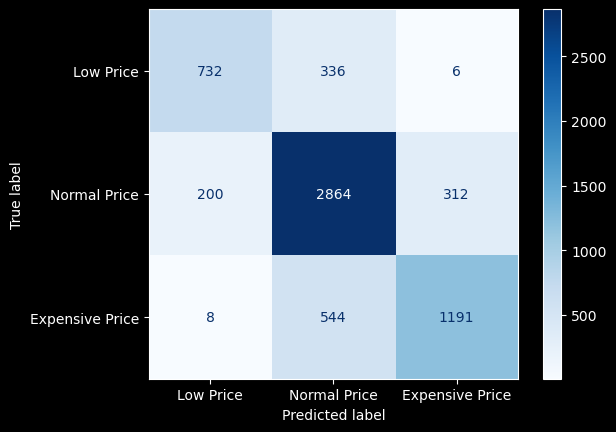

In [77]:
plt.style.use('dark_background')

# Assuming y_pred is already defined from your classifier predictions
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Visualize the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Low Price', 'Normal Price', 'Expensive Price'])
disp.plot(cmap='Blues')
plt.show()

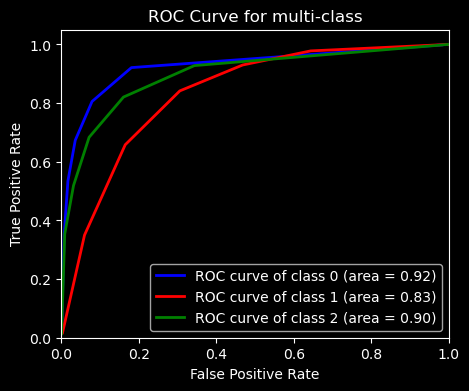

In [78]:

# Binarize the output
y_bin = label_binarize(y_test, classes=[0, 1, 2])
n_classes = y_bin.shape[1]

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plotting
plt.figure(figsize=[5, 4])
colors = ['blue', 'red', 'green']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for multi-class')
plt.legend(loc="lower right")
plt.show()

In [79]:
# Binarize the output
y_bin = label_binarize(y_test, classes=[0, 1, 2])
n_classes = y_bin.shape[1]

# Compute AUC for each class and store
auc_scores = []
for i in range(n_classes):
    auc_score = roc_auc_score(y_bin[:, i], y_pred_proba[:, i])
    auc_scores.append(auc_score)
    print(f"AUC for class {i}: {auc_score}")

# Calculate the average AUC
average_auc = np.mean(auc_scores)
print(f"Average AUC: {average_auc}")

AUC for class 0: 0.9235836077155141
AUC for class 1: 0.8327707263954292
AUC for class 2: 0.8953158379908076
Average AUC: 0.8838900573672502


### Task 5. Train and evaluate the multi-class classifier using SVM
<span style="color:red">**[TBC]**</span> Using SVM to build a multi-class classifier, train the model and evaluate the performance using confusion matrix and `classification_report`.

In [80]:
# [TBC] complete your code here with proper comments
# construct the pipeline
clf = Pipeline(
    [
        ('standard scaler', StandardScaler()),
        ('support vector machine', SVC(
            kernel = 'linear' # linear kernel function
        ))
    ]
)

In [81]:
# fit the model
clf.fit(X_train, y_train)

Pipeline(steps=[('standard scaler', StandardScaler()),
                ('support vector machine', SVC(kernel='linear'))])

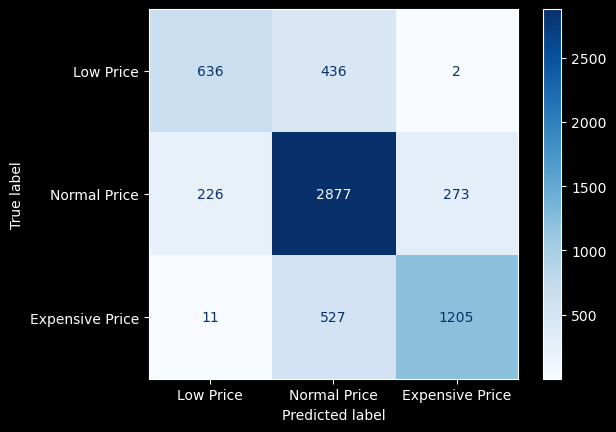

In [88]:
# predict categories for testing dataset
y_pred = clf.predict(X_test)
# show the first 5 predictions
y_pred[:5]

# compute and display the confusion matrix
cm1 = confusion_matrix(y_test, y_pred)
# Visualize the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm1, display_labels=['Low Price', 'Normal Price', 'Expensive Price'])
disp.plot(cmap='Blues')
plt.show()


In [89]:
# get all metrics using `classification_report`
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.73      0.59      0.65      1074
           1       0.75      0.85      0.80      3376
           2       0.81      0.69      0.75      1743

    accuracy                           0.76      6193
   macro avg       0.76      0.71      0.73      6193
weighted avg       0.76      0.76      0.76      6193



### Challenge. Improve the performance of the above classifier

Try to improve the performance of the above classifiers by adding feature selection process and changing parameter values.

### Multi Class Classifier

In [22]:
# [TBC] complete your code here with proper comments
# Updated Pipeline with Feature Selection and SMOTE
clf = ImbPipeline([
    ('standard scaler', StandardScaler()),
    ('feature selection', SelectKBest(mutual_info_classif, k=5)),  # Select top 5 features
    ('oversampling', SMOTE(random_state=0)),  # Handle class imbalance
    ('k-nearest neighbors', KNeighborsClassifier(metric='minkowski'))
])

In [23]:
# Hyperparameter Tuning using GridSearchCV
param_grid = {
    'k-nearest neighbors__n_neighbors': [3, 5, 7, 9],  # Different values for n_neighbors
    'k-nearest neighbors__weights': ['uniform', 'distance'],  # Different weighting schemes
    'feature selection__k': [3, 5, 7, 10]  # Number of features to select
}


In [33]:
# Randomized Search with fewer CV folds and limited iterations
"""
random_search = RandomizedSearchCV(clf, param_distributions=param_grid, n_iter=10, cv=3, n_jobs=-1)
random_search.fit(X_train, y_train)

print("Best parameters found:", random_search.best_params_)
print("Best score:", random_search.best_score_)
"""

# It can be done with GridSearch, but computing operation time is high
grid_search = GridSearchCV(clf, param_grid, cv=5)  # 5-fold cross-validation
grid_search.fit(X_train, y_train)
print("Best parameters found:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)



c:\Users\Jhonnatan\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
40 fits failed out of a total of 160.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Jhonnatan\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Jhonnatan\anaconda3\lib\site-packages\imblearn\pipeline.py", line 293, in fit
    Xt, yt = self._fit(X, y, **fit_params_steps)
  File "c:\Users\Jhonnatan\anaconda3\lib\site-packages\imblearn\pipeline.py", line 240, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File 

Best parameters found: {'feature selection__k': 3, 'k-nearest neighbors__n_neighbors': 9, 'k-nearest neighbors__weights': 'distance'}
Best score: 0.7690866081940686


In [40]:
# Predict and evaluate with best parameters
# Generate and print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Get the best estimator
best_clf = grid_search.best_estimator_
# Then predict probabilities with the best estimator
y_prob = best_clf.predict_proba(X_test)

# Generate and print the classification report
class_report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(class_report)

Confusion Matrix:
[[ 919  146    9]
 [ 443 2456  477]
 [  15  291 1437]]

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.86      0.75      1074
           1       0.85      0.73      0.78      3376
           2       0.75      0.82      0.78      1743

    accuracy                           0.78      6193
   macro avg       0.75      0.80      0.77      6193
weighted avg       0.79      0.78      0.78      6193



[[ 919  146    9]
 [ 443 2456  477]
 [  15  291 1437]]


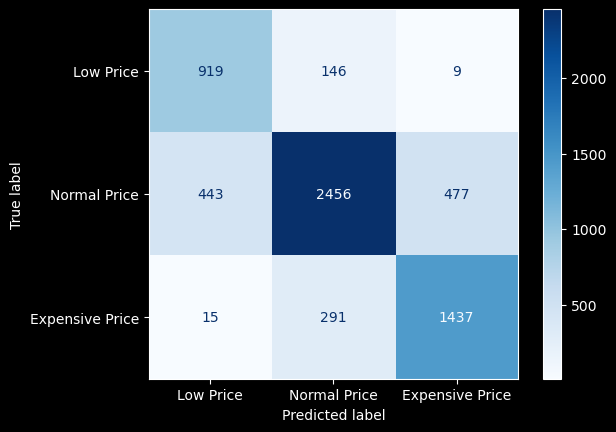

In [35]:
plt.style.use('dark_background')

# Assuming y_pred is already defined from your classifier predictions
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Visualize the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Low Price', 'Normal Price', 'Expensive Price'])
disp.plot(cmap='Blues')
plt.show()

In [41]:
# Binarize the output classes
y_test_binarized = label_binarize(y_test, classes=[0, 1, 2])

# Compute ROC curve and ROC area for each class
n_classes = y_test_binarized.shape[1]
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

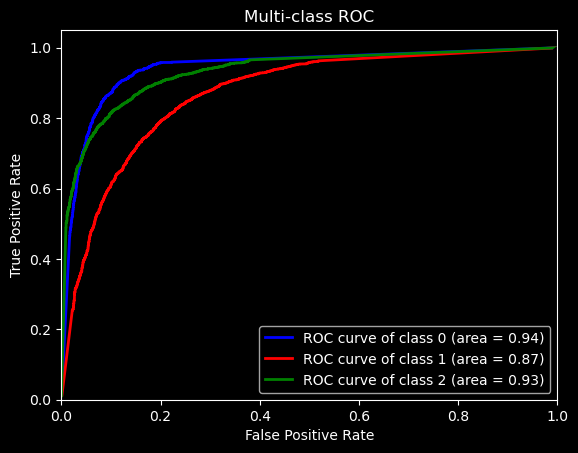

In [42]:
# Plotting
colors = ['blue', 'red', 'green']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class ROC')
plt.legend(loc="lower right")
plt.show()

In [45]:
# Binarize the output classes
y_test_binarized = label_binarize(y_test, classes=[0, 1, 2])

# Compute ROC curve and ROC area for each class
n_classes = y_test_binarized.shape[1]
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# AUC scores are stored in roc_auc
print("AUC for each class:", roc_auc)

AUC for each class: {0: 0.9413254123554013, 1: 0.8690002788587234, 2: 0.9307582174605323}


### SVM Multi Class Classifier 

Improving the performance of a multi-class SVM classifier while minimizing computing time requires a balance between model complexity and efficiency. Here are some strategies to achieve this

##### Feature Scaling
Ensure that your features are scaled properly. This can significantly speed up the training process of SVMs.

In [5]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

##### Simplify the Model
Use a simpler kernel like 'linear' if you're not already. Linear SVMs are generally faster and require less computation time than non-linear kernels like 'rbf'.

In [19]:

# Create a pipeline with StandardScaler and LinearSVC
clf = Pipeline([
    ('standard_scaler', StandardScaler()),
    ('linear_svc', LinearSVC())  # Using LinearSVC here
])

In [20]:
# fit the model
clf.fit(X_train, y_train)

c:\Users\Jhonnatan\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline(steps=[('standard_scaler', StandardScaler()),
                ('linear_svc', LinearSVC())])

In [21]:
sel = VarianceThreshold(threshold=(.8 * (1 - .8)))  # Example threshold
X_train_sel = sel.fit_transform(X_train_scaled)
X_test_sel = sel.transform(X_test_scaled)

##### Reduce the Feature Space

Instead of using sophisticated feature selection methods, try reducing the feature space by removing features that are less likely to be informative, such as those with low variance.

In [22]:
from sklearn.feature_selection import VarianceThreshold

sel = VarianceThreshold(threshold=(.8 * (1 - .8)))  # Example threshold
X_train_sel = sel.fit_transform(X_train_scaled)
X_test_sel = sel.transform(X_test_scaled)

##### Optimize Hyperparameters Carefully
Limit the range and number of hyperparameters in grid search. A broader range and more options increase computation time.

In [23]:
param_grid = {
    'support vector machine__C': [1, 10],  # Reduced range
    'support vector machine__kernel': ['linear']  # Only linear kernel
}

grid_search = GridSearchCV(clf, param_grid, cv=3, n_jobs=-1) # Use n_jobs=-1 for parallel processing

##### Use a Faster SVM Implementation
Consider using LinearSVC instead of SVC with a linear kernel. LinearSVC is often faster for large datasets with a large number of features.

Early Stopping:
Some implementations of SVM allow for early stopping. This stops training once the model ceases to make significant progress.

In [25]:
clf.set_params(linear_svc__max_iter=1000)

Pipeline(steps=[('standard_scaler', StandardScaler()),
                ('linear_svc', LinearSVC())])

In [31]:
# predict categories for testing dataset
y_pred = clf.predict(X_test)
# show the first 5 predictions
y_pred[:5]

# Generate and print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Generate and print the classification report
class_report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(class_report)

Confusion Matrix:
[[ 408  660    6]
 [ 166 2893  317]
 [   4  623 1116]]

Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.38      0.49      1074
           1       0.69      0.86      0.77      3376
           2       0.78      0.64      0.70      1743

    accuracy                           0.71      6193
   macro avg       0.72      0.63      0.65      6193
weighted avg       0.72      0.71      0.70      6193



[[ 408  660    6]
 [ 166 2893  317]
 [   4  623 1116]]


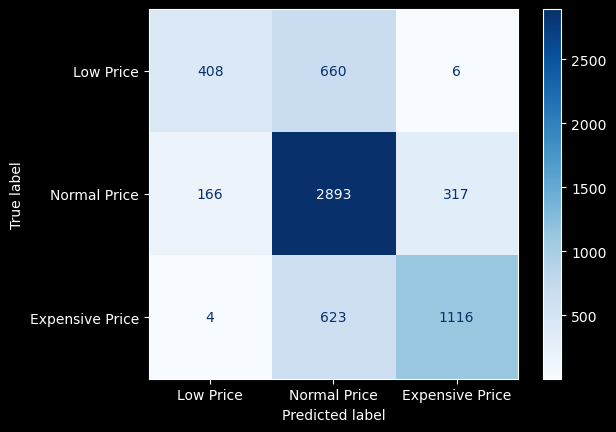

In [32]:
plt.style.use('dark_background')

# Assuming y_pred is already defined from your classifier predictions
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Visualize the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Low Price', 'Normal Price', 'Expensive Price'])
disp.plot(cmap='Blues')
plt.show()